In [27]:
import sqlite3
import pandas as pd
from datetime import datetime, timedelta

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setup sqlite
sqlite_file = 'hyper_live.db'
connection = sqlite3.connect(sqlite_file)
db = connection.cursor()

In [11]:
# read ALL tweets from db
all_tweets = pd.read_sql_query("SELECT * FROM TweetsRaw", connection)
all_tweets['createdAt'] = pd.to_datetime(all_tweets['createdAt'], format ='%a %b %d %H:%M:%S +0000 %Y')
all_tweets.index = all_tweets['createdAt']
print("{} tweets in db".format(len(all_tweets)))

4094 tweets in db


In [10]:
# Construct a dataframe joining data from TweetsRaw and BandTweets
band_tweets = pd.read_sql_query("SELECT bt.bandId, \
                                        b.name AS bandName, \
                                        b.codedName AS bandCodedName, \
                                        b.headLevel AS headLevel, \
                                        b.popularity AS popularity, \
                                        tr.* \
                                 FROM BandTweets AS bt\
                                 LEFT JOIN TweetsRaw AS tr ON bt.tweetRawId == tr.id \
                                 LEFT JOIN Bands AS b ON bt.bandId == b.id", connection)
band_tweets['createdAt'] = pd.to_datetime(band_tweets['createdAt'], format ='%a %b %d %H:%M:%S +0000 %Y')
band_tweets.index = band_tweets['createdAt']
print("{} band tweets in db".format(band_tweets.shape[0]))

1199 band tweets in db


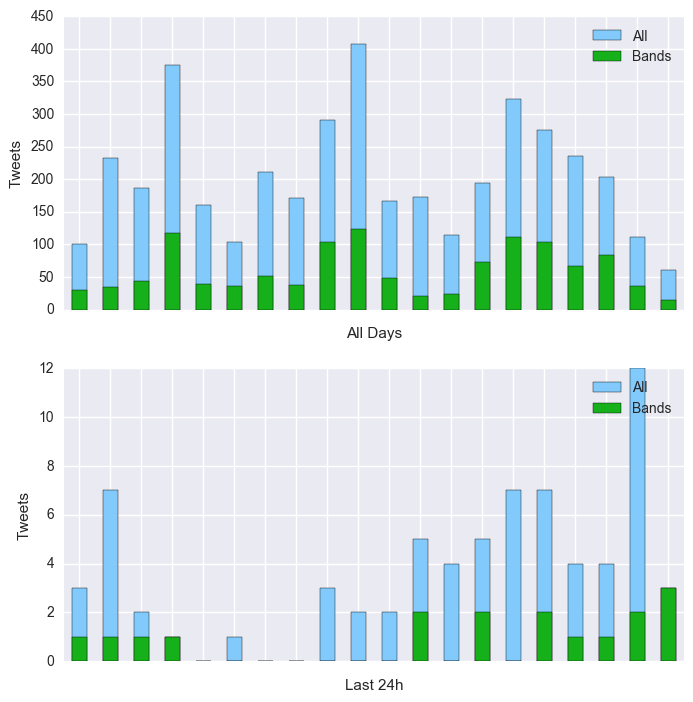

In [130]:
# https://chrisalbon.com/python/pandas_group_data_by_time.html

# timeline plot comparing alltweets vs bandtweets
fig = plt.figure(figsize=(8, 6))
plt.subplots_adjust(top=1.2)
ax1 = fig.add_subplot(211)
all_tweets.resample('D').count()['tweetId'].plot(kind='bar', \
                                                 color=sns.xkcd_rgb['sky'], \
                                                 label='All', \
                                                 ax=ax1)
band_tweets.resample('D').count()['bandId'].plot(kind='bar', \
                                                 color=sns.xkcd_rgb['green'], \
                                                 label='Bands', \
                                                 ax=ax1)
ax1.set_xlabel("All Days")
ax1.set_xticklabels([])
#ax1.set_xticklabels(list(np.arange(min(all_tweets['createdAt']).day, max(all_tweets['createdAt']).day + 1)), rotation=None)
ax1.set_ylabel("Tweets")
ax1.legend()


# get recent tweets (last 24h)
recent_all_tweets = all_tweets[ all_tweets['createdAt'] > (datetime.now() - timedelta(hours=24))]
recent_band_tweets = band_tweets[ band_tweets['createdAt'] > (datetime.now() - timedelta(hours=24))]

# plot last day of tweets & band_tweets
ax2 = fig.add_subplot(212)
ax2 = recent_all_tweets.resample('H').count()['tweetId'].plot(kind='bar', \
                                                              color=sns.xkcd_rgb['sky'], \
                                                              label='All', \
                                                              ax=ax2)
recent_band_tweets.resample('H').count()['bandId'].plot(kind='bar', \
                                                        color=sns.xkcd_rgb['green'], \
                                                        label='Bands', \
                                                        ax=ax2)
ax2.set_xlabel("Last 24h")
ax2.set_xticklabels([])
ax2.set_ylabel("Tweets")
ax2.legend()

In [26]:
# Reformat xticks
# 
# TO-DO
# 
# http://stackoverflow.com/questions/30133280/pandas-bar-plot-changes-date-format

In [ ]:
# Timeline of single bands (top-n?)
# 
# TO-DO
# 
# 